## Feature Analysis - Feature Correlation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../00-data/Housing.csv')

In [4]:
encodedDf = df.copy()

In [5]:
encodedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# Econding Binaray Variable
bi_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
bi_mapping = {"no" : 0, "yes" : 1}

for col in bi_cols:
    encodedDf[col] = encodedDf[col].map(bi_mapping)

encodedDf = pd.get_dummies(encodedDf, columns=['furnishingstatus'], drop_first=True)

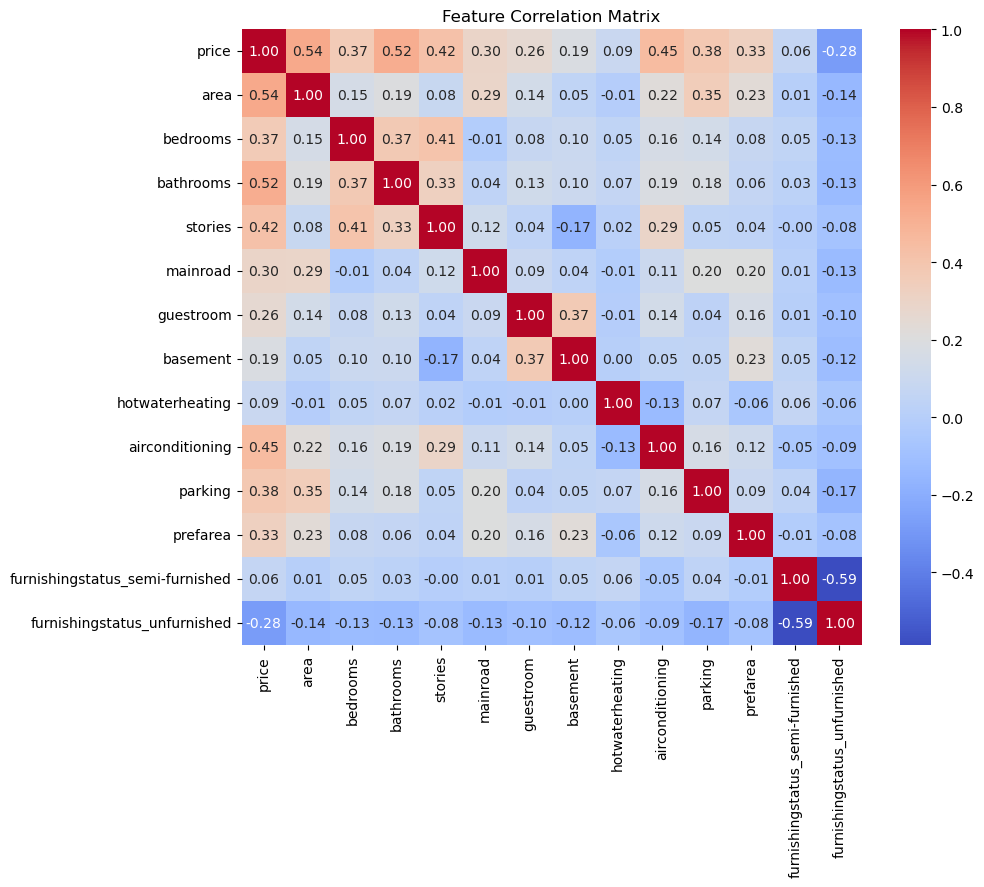

Highly correlated features with target: ['area', 'bathrooms']


In [8]:
# Compute Pearson correlation
corr_matrix = encodedDf.corr()

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Selecting highly correlated features (absolute value > 0.5)
threshold = 0.5
high_corr_features = corr_matrix[abs(corr_matrix['price']) > threshold]['price'].index.tolist()
high_corr_features.remove('price')  # Remove the target itself
print("Highly correlated features with target:", high_corr_features)


### Conclusion

##### Correlation Patterns: 

Strong postive correlation (0.31 - 0.60)
- area (0.54) size of a house strongly correlated to the price
- bathroom (0.52)
- airconditioning (0.45) 
- stories (0.42) 
- parking (0.38)
- bedroom (0.37)
- prefarea (0.33)

Moderate to weak correlation (0.0 - 0.30)
- mainroad (0.30)
- guestroom (0.26)
- basement (0.19)
- hotwaterheating (0.09)
- furnishingstatus_semi-furnished (0.06)

Negative correlation (< 0)
- furnishingstatus_unfurnished (-0.28)